1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [3]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/oduwo/Box Sync/MBUAN_Courses/FALL_18/ProgrammingForDataScience/ClassNotes')
df_Batting = pd.read_csv('Batting.csv')

In [3]:
df_Batting.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


2)	Print out the dimensions and info about the dataframe you just created

In [5]:
df_Batting.shape

(102816, 25)

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [16]:
battinggrp = df_Batting.groupby(['playerID','yearID'])[['HR']].sum()
len(battinggrp[battinggrp['HR'] >=40])

330

#4.How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [9]:
battinggrp600 = df_Batting.groupby(['nameFirst','nameLast'])[['HR']].sum()
battinggrp600[battinggrp600['HR']>600]

,,HR
nameFirst,nameLast,
Alex,Rodriguez,696
Babe,Ruth,714
Barry,Bonds,762
Frank,Thomas,807
Hank,Aaron,755
Jim,Thome,612
Ken,Griffey,782
Sammy,Sosa,609
Willie,Mays,660


5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [4]:
newbattinggrp = df_Batting.groupby(['playerID'])['HR','3B','H','2B'].sum()
myans=newbattinggrp[(newbattinggrp['2B'] >=40) & (newbattinggrp['3B']>=10) & (newbattinggrp['H']>=200) & (newbattinggrp['HR']>=30)]
len(myans)

1758

6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [6]:
battinggrp_sb = df_Batting.groupby(['yearID','nameFirst','nameLast'])[['SB']].sum()
battinggrp_sb[battinggrp_sb['SB']>100].sort_values(by=['SB'],ascending=[False])

SB
yearID nameFirst nameLast        
1887   Hugh      Nicol      138.0
1982   Rickey    Henderson  130.0
1887   Arlie     Latham     129.0
1974   Lou       Brock      118.0
1887   Charlie   Comiskey   117.0
       John      Ward       111.0
1891   Billy     Hamilton   111.0
1889   Billy     Hamilton   111.0
1985   Vince     Coleman    110.0
1987   Vince     Coleman    109.0
1888   Arlie     Latham     109.0
1983   Rickey    Henderson  108.0
1986   Vince     Coleman    107.0
1891   Tom       Brown      106.0
1962   Maury     Wills      104.0
1888   Hugh      Nicol      103.0
1887   Pete      Browning   103.0
       Jim       Fogarty    102.0
1890   Billy     Hamilton   102.0

7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [ ]:
battinggrp_hr = df_Batting.groupby(['nameFirst','nameLast'])[['HR']].sum()
battinggrp_hr[(battinggrp_hr['yearID'==1960]) & (battinggrp_hr['HR']>=200).sort_values(by=['HR'], ascending=[False])


8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [7]:
most_hr = df_Batting.groupby(['playerID','nameFirst','nameLast'])[['HR']].sum()
most_hr.sort_values(by=['HR'],ascending=[False]).head(1)

,,,HR
playerID,nameFirst,nameLast,
bondsba01,Barry,Bonds,762


9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [8]:
most_hit = df_Batting.groupby(['playerID','nameFirst','nameLast'])[['H']].sum()
most_hit.sort_values(by=['H'],ascending=[False]).head(1)

,,,H
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,4256


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [9]:
df_Batting['OBP']=(df_Batting['H'] + df_Batting['BB'] + df_Batting['HBP'])/(df_Batting['AB'] + df_Batting['BB']+ df_Batting['HBP']+ df_Batting['SF'])
df_Batting['PA']=df_Batting['AB'] + df_Batting['BB'] + df_Batting['HBP'] + df_Batting['SH'] + df_Batting['SF']
top5OBP = df_Batting.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False)['OBP','PA'].sum().sort_values(by=['OBP'],ascending=[False])
top5OBP[(top5OBP['PA']>=500) & (top5OBP['yearID']==1977)].nlargest(5,'OBP')


,yearID,playerID,nameFirst,nameLast,OBP,PA
51164,1977,raderdo02,Doug,Rader,0.715277,568.0
50578,1977,bochtbr01,Bruce,Bochte,0.700293,552.0
50878,1977,hortowi01,Willie,Horton,0.587434,573.0
51262,1977,speiech01,Chris,Speier,0.497602,621.0
50637,1977,carewro01,Rod,Carew,0.448773,694.0


11)	Top 8 highest batting averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [10]:
df_Batting['AVG']= df_Batting['H']/df_Batting['AB']
top8av=df_Batting.groupby(['yearID','playerID','nameFirst','nameLast','PA'],as_index=False)[['AVG']].sum().sort_values(by=['AVG'],ascending=False)
top8av[(top8av['yearID']==2013) & (top8av['PA']>=300)].nlargest(8,'AVG')

,yearID,playerID,nameFirst,nameLast,PA,AVG
60419,2013,cabremi01,Miguel,Cabrera,652.0,0.347748
61285,2013,ramirha01,Hanley,Ramirez,336.0,0.345395
60530,2013,cuddymi01,Michael,Cuddyer,540.0,0.331288
61048,2013,mauerjo01,Joe,Mauer,508.0,0.323596
61510,2013,troutmi01,Mike,Trout,716.0,0.322581
60875,2013,johnsch05,Chris,Johnson,547.0,0.321012
60664,2013,freemfr01,Freddie,Freeman,629.0,0.319419
61266,2013,puigya01,Yasiel,Puig,432.0,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [12]:
HitLeaders40=df_Batting.groupby(['yearID','nameFirst','nameLast'],as_index=False)[['H']].sum()
myHitleads=pd.DataFrame()
for i in range (1940,1950):
    df = HitLeaders40[(HitLeaders40['yearID']==i)]
    myHitleads.append(df[(df['H']==max(df['H']))])
    myHitleads=myHitleads.append(df[(df['H']==max(df['H']))])
myHitleads

,yearID,nameFirst,nameLast,H
26685,1940,Barney,McCosky,200
26803,1940,Doc,Cramer,200
27093,1940,Rip,Radcliff,200
27271,1941,Cecil,Travis,218
28029,1942,Johnny,Pesky,205
28698,1943,Stan,Musial,220
29228,1944,Snuffy,Stirnweiss,205
29806,1945,Tommy,Holmes,224
30420,1946,Stan,Musial,228
30808,1947,Johnny,Pesky,207


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [30]:
hitmlb=pd.DataFrame()
mlbhits=df_Batting.groupby(['yearID','playerID','nameFirst','nameLast'], as_index=False)['H'].sum()
for i in range(1871,2017,1):
    newmlbhits=mlbhits[mlbhits['yearID']==i]
    hitmlb = hitmlb.append(newmlbhits[newmlbhits['H']== max(newmlbhits['H'])].reset_index()[['yearID','playerID','nameFirst','nameLast','H']]).sort_values(by='yearID',ascending=True).drop_duplicates()
hitmlb =hitmlb.groupby(['playerID','nameFirst','nameLast'],as_index = False).count()[['playerID','H']]
print(hitmlb[hitmlb['H']==max(hitmlb['H'])])

     playerID  H
22   cobbty01  7
75   rosepe01  7
85  suzukic01  7


14) Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [15]:
mostgames=df_Batting.groupby(['playerID','nameFirst','nameLast'],as_index=False)[['G']].sum().sort_values(by='G',ascending=False)
mostgames.nlargest(5,'G')


,playerID,nameFirst,nameLast,G
14719,rosepe01,Pete,Rose,3562
18728,yastrca01,Carl,Yastrzemski,3308
1,aaronha01,Hank,Aaron,3298
7383,henderi01,Rickey,Henderson,3081
3155,cobbty01,Ty,Cobb,3035


15)	How many players have had 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [16]:
Q15=df_Batting.groupby(['playerID'])['H','HR'].sum()
len(Q15[(Q15['H']>=3000) & (Q15['HR']>=500)])

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [17]:
HRS=df_Batting.groupby(['playerID','yearID',],as_index=False)['HR'].sum()
HRS[HRS['yearID']==1988].HR.sum()

3180

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [18]:
top3avg=df_Batting.groupby(['yearID','nameFirst','nameLast'],as_index=False)['AVG','AB'].sum()
top3avg[(top3avg['nameFirst']=='Wade') & (top3avg['AB']>=500) & (top3avg['nameLast']=='Boggs')].nlargest(3,'AVG')

,yearID,nameFirst,nameLast,AVG,AB
58678,1985,Wade,Boggs,0.367534,653
61568,1988,Wade,Boggs,0.366438,584
60602,1987,Wade,Boggs,0.362976,551


18) Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [19]:
df_Batting[(df_Batting['yearID']==1995) & (df_Batting['PA']>=400)].sort_values(by='OBP',ascending=False).nlargest(10,'OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.478873
73996,Frank,Thomas,0.454405
73611,Mark,McGwire,0.440758
73999,Jim,Thome,0.438061
73002,Barry,Bonds,0.431496
73875,Tim,Salmon,0.429467
73145,Chili,Davis,0.429119
73560,Dave,Magadan,0.427553
73495,Chuck,Knoblauch,0.424483
73671,Tim,Naehring,0.414729


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [21]:
total3b=pd.DataFrame()
most3b=df_Batting.groupby(['yearID','playerID','nameFirst','nameLast'],as_index=False)['3B'].sum()
for i in (1922,1925,1926,1928):
    df = most3b[(most3b['yearID']==i)]
    total3b.append(df[(df['3B']==max(df['3B']))])
    total3b=total3b.append(df[(df['3B']==max(df['3B']))])
total3b

,yearID,playerID,nameFirst,nameLast,3B
17778,1922,daubeja01,Jake,Daubert,22
19325,1925,cuyleki01,Kiki,Cuyler,26
20219,1926,wanerpa01,Paul,Waner,22
20860,1928,combsea01,Earle,Combs,21


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [22]:
uniqhit=df_Batting.groupby(['yearID','playerID'],as_index=False)['HR','SB'].sum()
newuniqhit=uniqhit[(uniqhit['HR']>=30) & (uniqhit['SB']>=30)].drop_duplicates('playerID')
len(newuniqhit)

38

21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [23]:
df_obp86=df_Batting[(df_Batting['yearID']==1986) & (df_Batting['AB']>=400)]
df_obp86[(df_obp86['OBP']==max(df_obp86['OBP']))][['yearID','nameFirst','nameLast','OBP']]

,yearID,nameFirst,nameLast,OBP
63320,1986,Wade,Boggs,0.45283


22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [24]:
df_obp97=df_Batting[(df_Batting['yearID']==1997) & (df_Batting['AB']>=400) & (df_Batting['lgID']=='NL')]
df_obp97[(df_obp97['OBP']==max(df_obp97['OBP']))][['yearID','nameFirst','nameLast','OBP']]

,yearID,nameFirst,nameLast,OBP
76562,1997,Larry,Walker,0.451807


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [25]:
av23=df_Batting[(df_Batting['yearID']==2012) & (df_Batting['AB']>=500)].HR.mean()
df_Batting[(df_Batting['yearID']==2012) & (df_Batting['AB']>=500)&(df_Batting['HR']>av23)][['nameFirst','nameLast','HR']].sort_values(by='HR',ascending=False).reset_index()


,index,nameFirst,nameLast,HR
0,95768,Miguel,Cabrera,44
1,96114,Josh,Hamilton,43
2,96081,Curtis,Granderson,43
3,95969,Edwin,Encarnacion,42
4,95728,Ryan,Braun,41
5,95952,Adam,Dunn,41
6,95687,Adrian,Beltre,36
7,96971,Josh,Willingham,35
8,95741,Jay,Bruce,34
9,96301,Adam,LaRoche,33


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [26]:
df_Batting['AGE']=df_Batting['yearID'] - df_Batting['birthYear']
young50=df_Batting.groupby(['yearID','playerID','nameFirst','nameLast','AGE'],as_index=False)['HR'].sum()
young50[young50['HR']>=50].sort_values(by='AGE',ascending=False).nsmallest(1,'AGE')[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
82621,Prince,Fielder,50,2007


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

BONUS:  Graph total HRs per season using bar graph

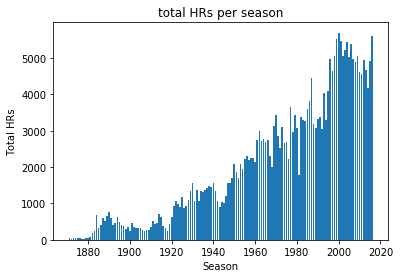

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
barplot=df_Batting.groupby('yearID',as_index=False)['HR'].sum()
x=barplot['yearID']
y= barplot['HR']
ind=np.arange(len(x))
plt.bar(x, y)
plt.ylabel('Total HRs')
plt.xlabel('Season')
plt.title('total HRs per season') 
plt.show()

Using a line graph please graph the average HRs per AB (think about this) per season

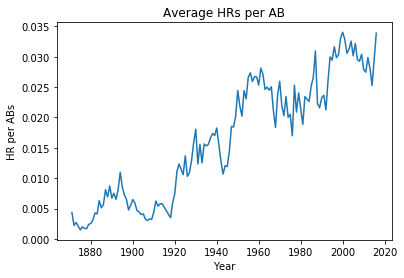

In [29]:
import matplotlib.pyplot as plt
import numpy as np
lineplot=df_Batting.groupby(['yearID'],as_index=False)['HR','AB'].sum()
lineplot['AVGHRPERAB']=lineplot['HR']/lineplot['AB']
y=lineplot['AVGHRPERAB']
x= lineplot['yearID']
plt.plot(x,y)
plt.ylabel('HR per ABs')
plt.xlabel('Year')
plt.title('Average HRs per AB') 
plt.show()
